# Housing Price Prediction-Advanced Regression Assignment

In [1]:
#importing libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
#reading file
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking the structure of dataframe
print(df.shape)
print(df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

## Data Cleaning and Handling Missing Data

In [4]:
#Finding list of missing values
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
#Dropping variables with lots of missing data
df=df.drop(['PoolQC','Id','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)


In [6]:
# Imputing data of vaiables where'NA' implies abscense of feature under consideration, with the value 'No'
#na_values= ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
#df[na_values]=df[na_values].fillna('No')
na_values= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','GarageType','GarageYrBlt','GarageQual','GarageCond']
df[na_values]=df[na_values].fillna('No')

In [7]:
#Random checking of variable to find out if imputed properly
print(df.Electrical.isnull().sum())
#print(df.PoolQC.value_counts())

1


In [8]:
#rechecking list of missing values
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageFinish     81
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
               ... 
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 75, dtype: int64

In [9]:
# check distribution of variable with highest missing values
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
#imputing values with median value 69 and recheking null values
df['LotFrontage']=df['LotFrontage'].fillna(69)
df.isnull().sum().sort_values(ascending=False)

GarageFinish    81
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
                ..
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 75, dtype: int64

In [11]:
# check value of variable with highest missing values
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [12]:
#imputing values with most common value 'Unf' and recheking null values
df['GarageFinish']=df['GarageFinish'].fillna('Unf')
df.isnull().sum().sort_values(ascending=False)

BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
                ..
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 75, dtype: int64

In [13]:
# check value of variable with highest missing values
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [14]:
#Since there are 2 values with almost equal frequency we can delete the null rows. also since other columns with null are we can delete them too
df.dropna(axis=0, how='any', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1414 non-null   int64  
 1   MSZoning       1414 non-null   object 
 2   LotFrontage    1414 non-null   float64
 3   LotArea        1414 non-null   int64  
 4   Street         1414 non-null   object 
 5   LotShape       1414 non-null   object 
 6   LandContour    1414 non-null   object 
 7   Utilities      1414 non-null   object 
 8   LotConfig      1414 non-null   object 
 9   LandSlope      1414 non-null   object 
 10  Neighborhood   1414 non-null   object 
 11  Condition1     1414 non-null   object 
 12  Condition2     1414 non-null   object 
 13  BldgType       1414 non-null   object 
 14  HouseStyle     1414 non-null   object 
 15  OverallQual    1414 non-null   int64  
 16  OverallCond    1414 non-null   int64  
 17  YearBuilt      1414 non-null   int64  
 18  YearRemo

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
#checking if the sum of basement areas is equal to TotalBsmtSF
(df.BsmtFinSF1+df.BsmtFinSF2+df.BsmtUnfSF==df.TotalBsmtSF).value_counts()


True    1414
dtype: int64

The totals are equal. Hence we can remove df.TotalBsmtSF from our data. The same will be removed after plotting for EDA.

In [18]:
(df['1stFlrSF']+df['2ndFlrSF']==df['LowQualFinSF']+df['GrLivArea']).value_counts()

True     1389
False      25
dtype: int64

The sum of 1stfloor square feet and 2ndfloors square feet is equal to sum of low quality finish area and above grade living area in nearly 98% of cases. Hence we can eliminate 1st floor squarefeet and 2nd floor square feet. 
Low quality finish area and above grade living area might directly have implications on the model. Hence we are keeping them.

In [19]:
check=df[(df['1stFlrSF']+df['2ndFlrSF']!=df['LowQualFinSF']+df['GrLivArea'])]
(check['1stFlrSF']+check['2ndFlrSF']-check['LowQualFinSF']+check['GrLivArea']).mean()

3139.28

In [20]:
df.GarageQual.value_counts()

TA    1272
No      74
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [21]:
df.GarageCond.value_counts()

TA    1289
No      74
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [22]:
#df[['GarageQual','GarageCond']].astype('float64').corr()

In [23]:
print(df.Condition1.value_counts())
print('\n')
print(df.Condition2.value_counts())


Norm      1222
Feedr       75
Artery      47
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


Norm      1399
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64


In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Assign to categorical variables which are given numberical values, easily understandable values (Values assigned are short form for the Condition/quality given in Datasheet)

In [25]:
num=np.arange(1,11)
num

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1414 non-null   int64  
 1   MSZoning       1414 non-null   object 
 2   LotFrontage    1414 non-null   float64
 3   LotArea        1414 non-null   int64  
 4   Street         1414 non-null   object 
 5   LotShape       1414 non-null   object 
 6   LandContour    1414 non-null   object 
 7   Utilities      1414 non-null   object 
 8   LotConfig      1414 non-null   object 
 9   LandSlope      1414 non-null   object 
 10  Neighborhood   1414 non-null   object 
 11  Condition1     1414 non-null   object 
 12  Condition2     1414 non-null   object 
 13  BldgType       1414 non-null   object 
 14  HouseStyle     1414 non-null   object 
 15  OverallQual    1414 non-null   int64  
 16  OverallCond    1414 non-null   int64  
 17  YearBuilt      1414 non-null   int64  
 18  YearRemo

In [27]:
df['OverallQual']= df['OverallQual'].replace(num,['VE','EX','VG','G','AA','A','BA','F','P','VP'])

In [28]:
df['OverallCond']= df['OverallCond'].replace(num,['VE','EX','VG','G','AA','A','BA','F','P','VP'])

In [29]:
df[['OverallQual','OverallCond']].head()

,OverallQual,OverallCond
0,BA,AA
1,A,F
2,BA,AA
3,BA,AA
4,F,AA


In [30]:
#Convert MSSubClass as object so that dummies can be created during data preperation stage
df['MSSubClass']=df['MSSubClass'].astype('object')
df['MSSubClass'].dtype

dtype('O')

In [31]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,...,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,69.944130,10539.524045,1971.472419,1985.216407,105.528996,453.847949,48.063649,582.038897,1083.950495,1163.020509,...,96.255304,47.248232,21.987977,3.393211,15.550919,2.848656,41.226308,6.323197,2007.809052,182585.866337
std,22.275642,10107.102183,30.372708,20.458990,182.284897,455.560021,163.701790,438.206445,408.422296,385.259939,...,126.202414,66.490009,61.154734,29.411681,56.590406,40.822919,494.508749,2.710272,1.327600,79260.703288
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7579.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,247.250000,810.000000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131500.000000
50%,69.000000,9501.500000,1973.000000,1994.000000,0.000000,399.000000,0.000000,490.500000,1004.000000,1086.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164800.000000
75%,79.000000,11622.750000,2001.000000,2004.000000,168.000000,719.750000,0.000000,814.750000,1308.250000,1392.000000,...,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
print(df['PoolArea'].value_counts())

0      1407
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64


In [33]:
print(df['MiscVal'].value_counts())

0        1365
400        11
500         7
700         5
450         4
600         4
2000        4
480         2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1200        1
1300        1
1400        1
Name: MiscVal, dtype: int64


In [34]:
print(df['3SsnPorch'].value_counts())

0      1391
168       3
144       2
216       2
196       1
407       1
320       1
304       1
290       1
245       1
238       1
182       1
23        1
180       1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64


In [35]:
#Columns PoolArea,MiscVal,3SsnPorch are dominated by single values. Hence same can be removed
df=df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

#### Outlier Treatment

In [36]:
#Removing outliers
cols = list(df.dtypes[df.dtypes !='object'].index)
Q1=df[cols].quantile(0.05)
Q3=df[cols].quantile(0.95)
IQR=Q3-Q1
df=df[~((df[cols] < ( Q1 - 1.5 * IQR )) | (df[cols] > ( Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1307, 72)

## Visualising numerical variables

plotting variables 5 at a time and plotting the all of them against sales price

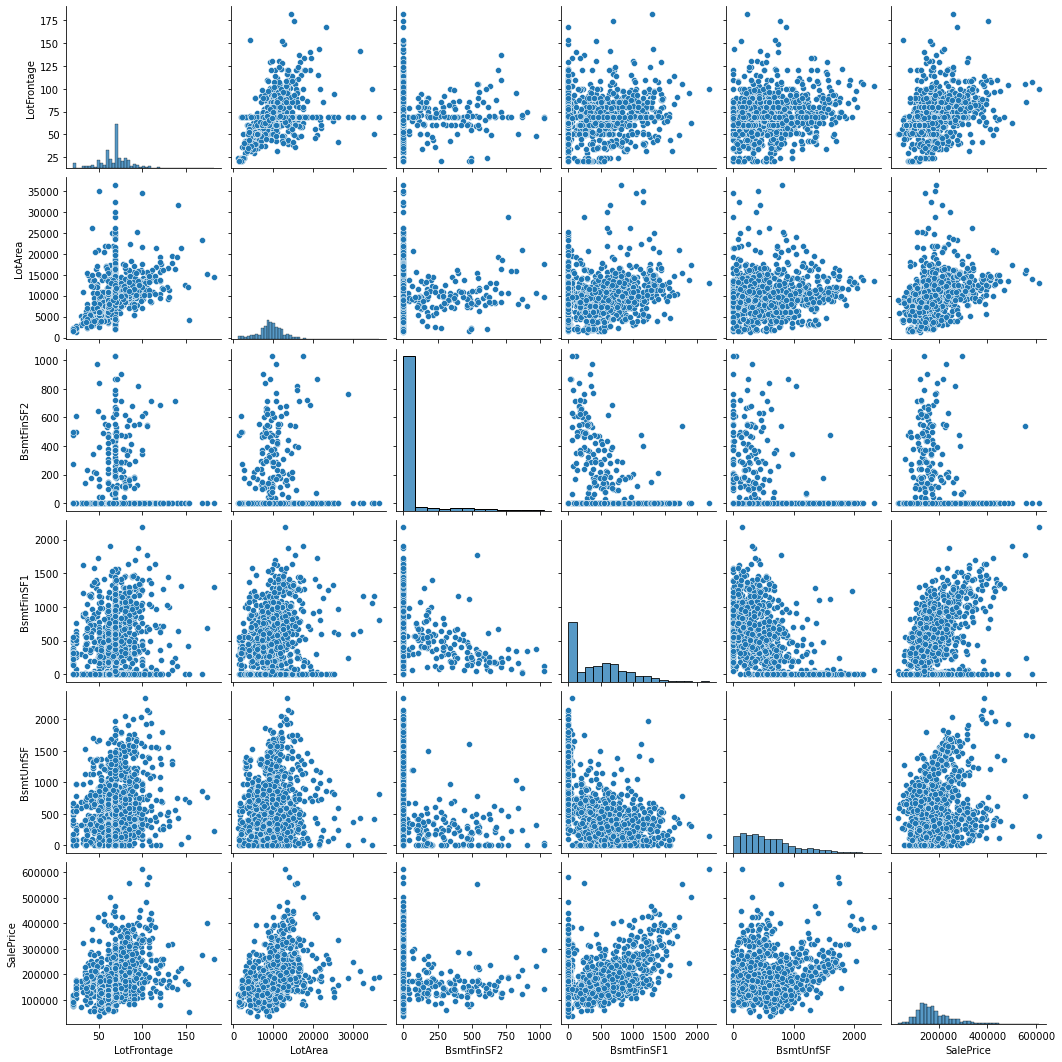

In [37]:
sns.pairplot(df[['LotFrontage','LotArea','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','SalePrice']])
plt.show()

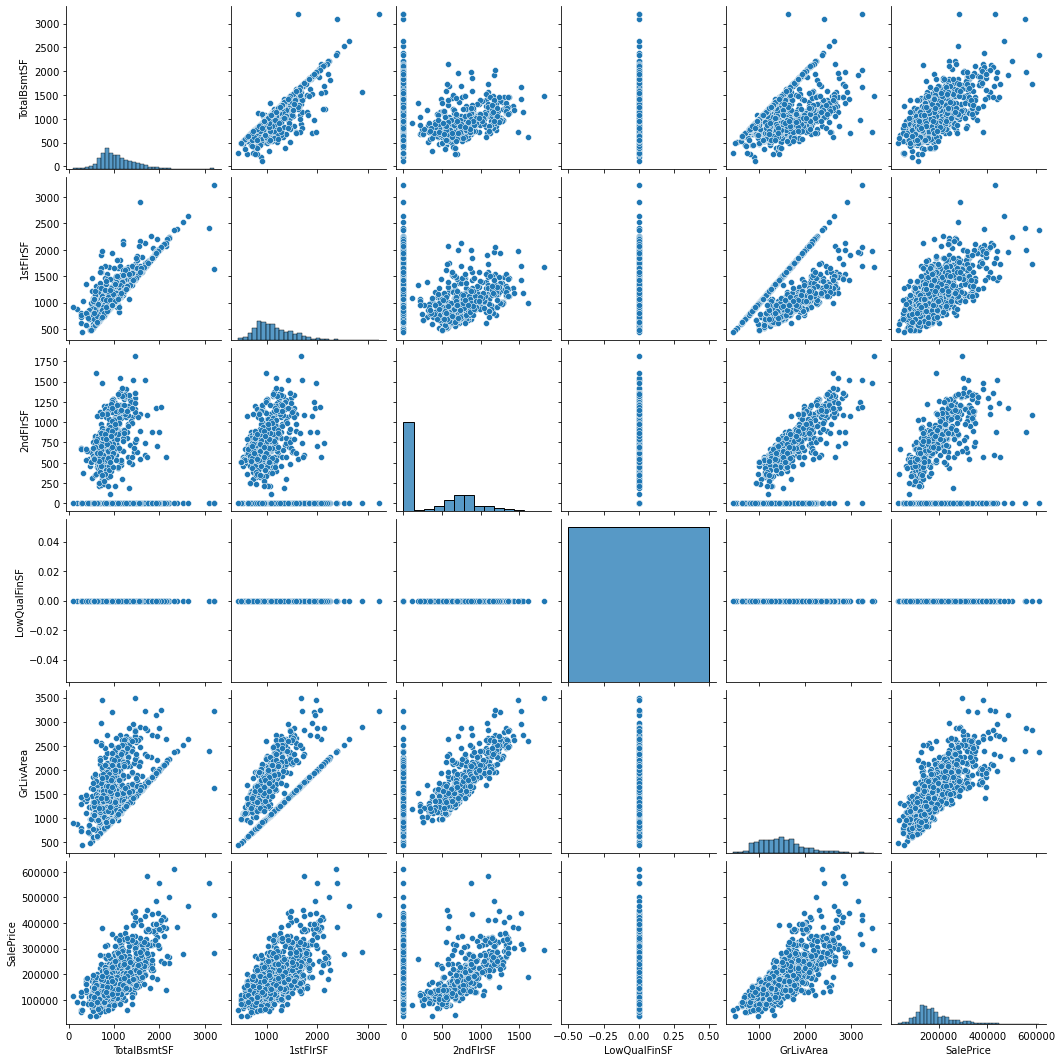

In [38]:
sns.pairplot(df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','SalePrice']])
plt.show()

Increase in variance observed with respect to target variable Price.
Some linear relationship observed b/w GrLivArea and TotalBsmntSF,1stFlrSF, 2ndFlrSF

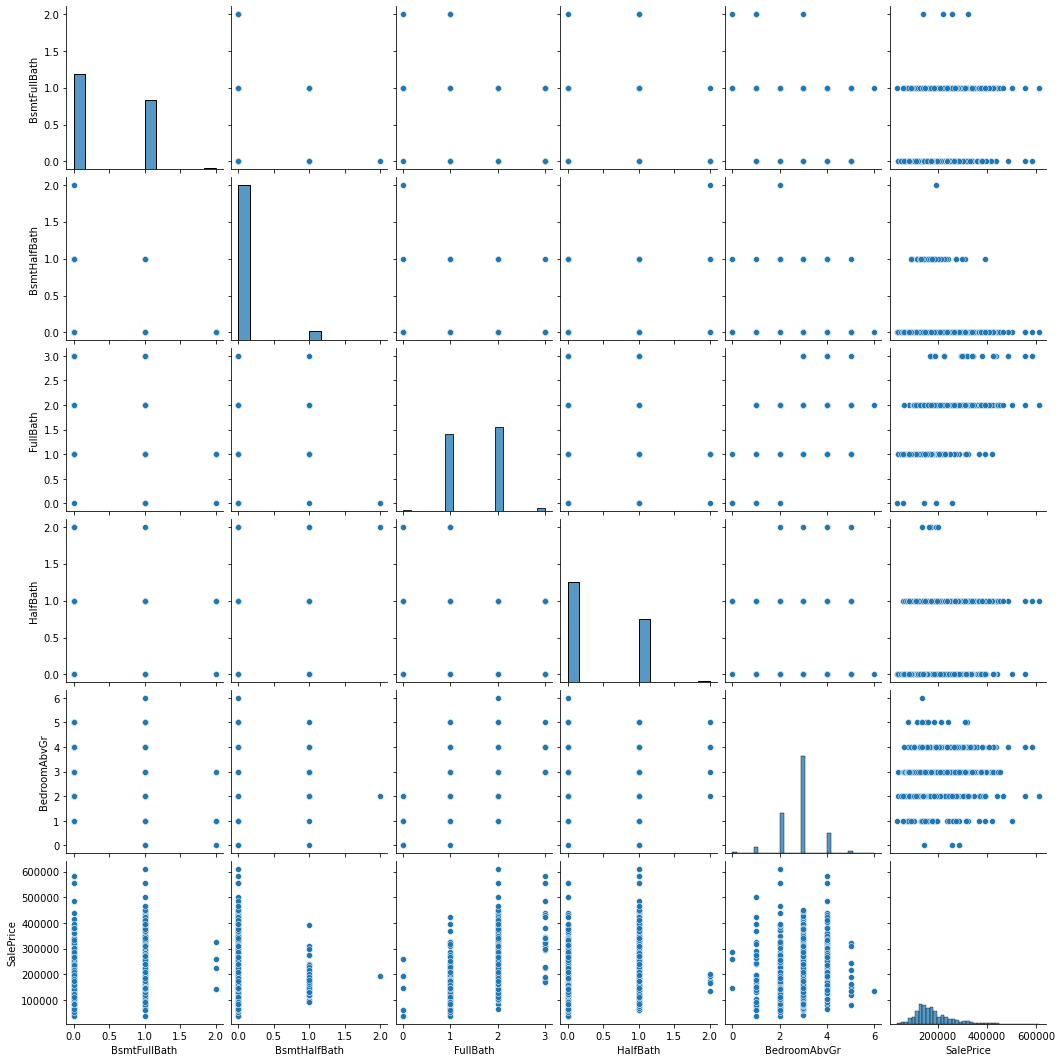

In [39]:
sns.pairplot(df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']])
plt.show()

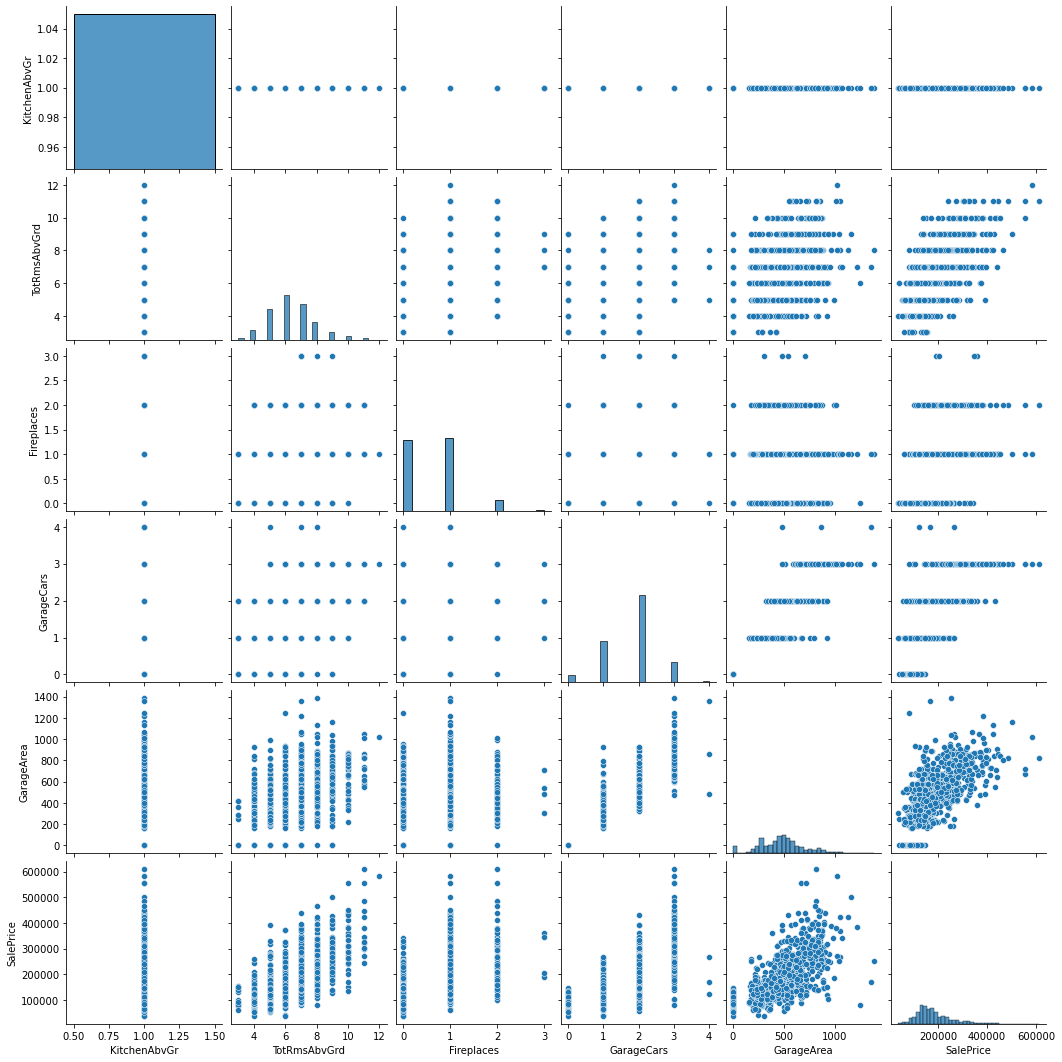

In [40]:
sns.pairplot(df[['KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','SalePrice']])
plt.show()

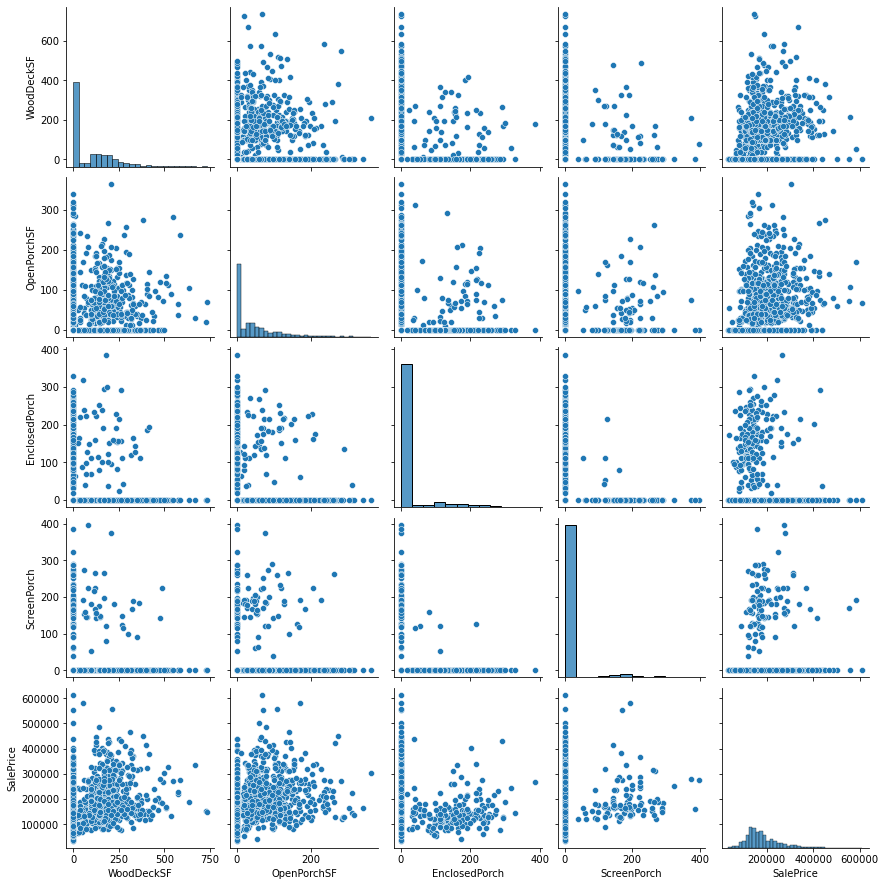

In [41]:
sns.pairplot(df[['WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','SalePrice']])
plt.show()

### Target variable vs few select columns

Text(0.5, 1.0, 'Sales Price vs Overall Condition')

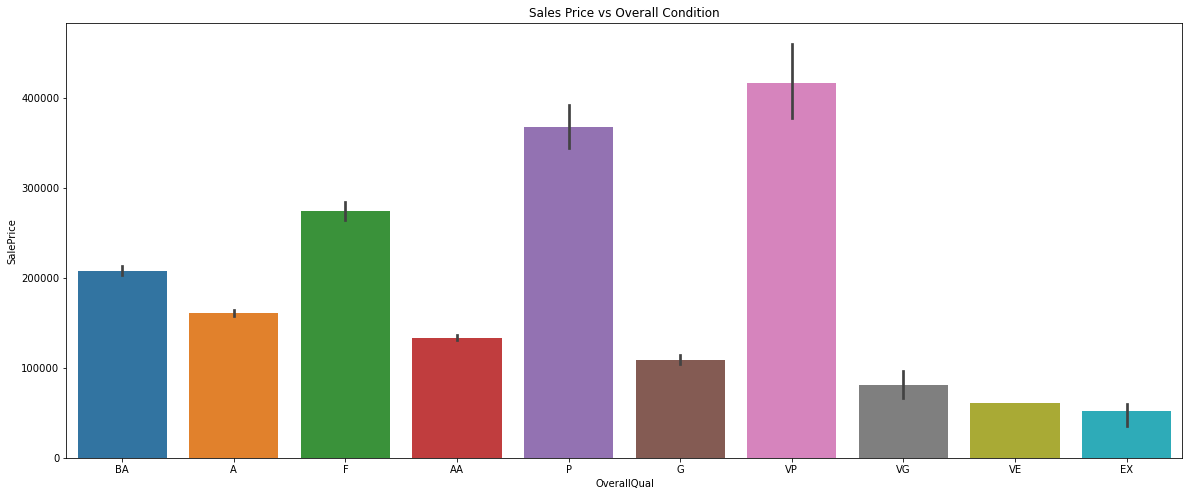

In [42]:
#Sales vs Overall Quality
plt.figure(figsize=(20, 8))
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Sales Price vs Overall Condition")

Text(0.5, 1.0, 'Sales Price vs Basement Quality')

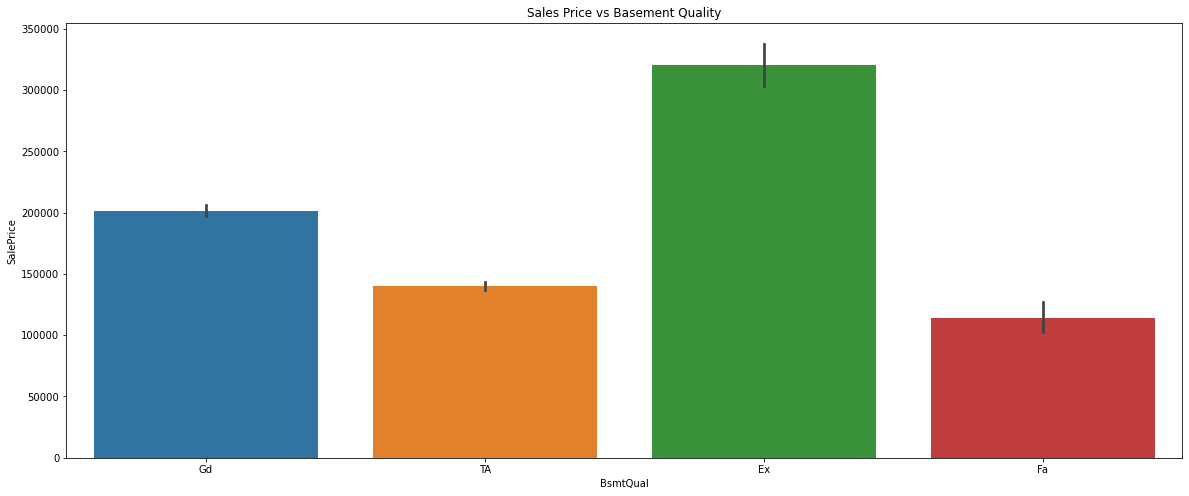

In [43]:
#Sales vs Basment Quality
plt.figure(figsize=(20, 8))
sns.barplot(x="BsmtQual", y="SalePrice", data=df)
plt.title("Sales Price vs Basement Quality")

Text(0.5, 1.0, 'Sales Price vs Basement Quality')

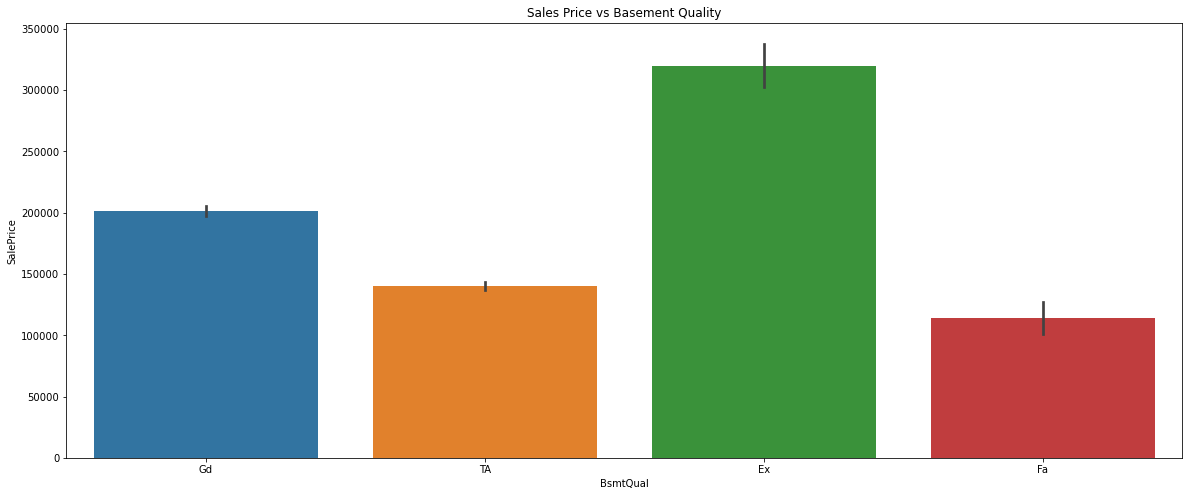

In [44]:
#Sales vs Basment Quality
plt.figure(figsize=(20, 8))
sns.barplot(x="BsmtQual", y="SalePrice", data=df)
plt.title("Sales Price vs Basement Quality")

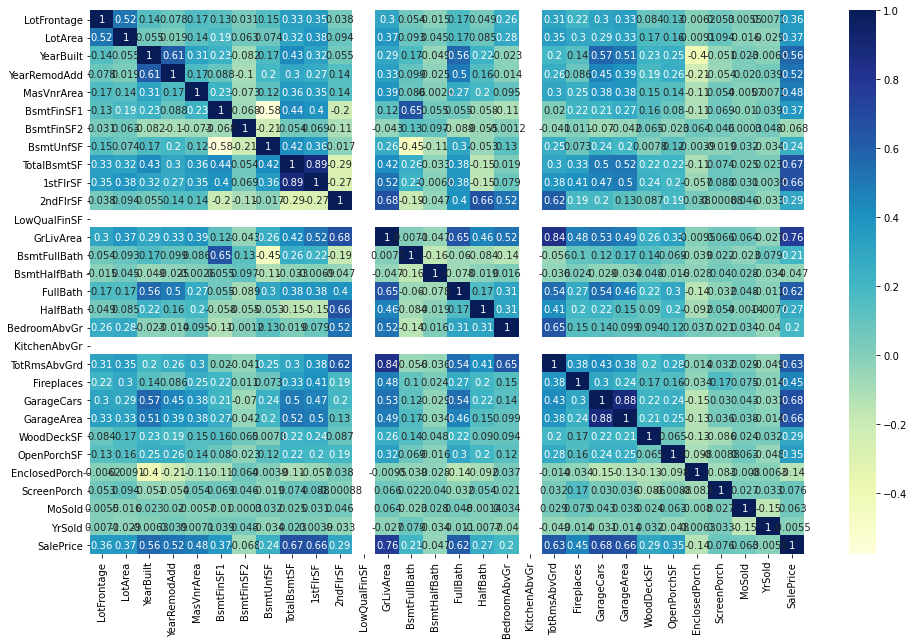

In [45]:
#Checking Heatmaps to see highly correlated coefficients
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()


In [46]:
#Removing collinear variable as discussed before
df=df.drop(['TotalBsmtSF'],axis=1)

### Data Preperation

#### Dummy Variable creation

In [47]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,1,0


### Train and Test set creation

In [48]:
df.shape

(1307, 344)

In [49]:
y=df.pop('SalePrice')
y.head()
X=df
X.shape

(1307, 343)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 343)
(393, 343)
(914,)
(393,)


In [52]:
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
469,76.0,9291,1993,1993,120.0,426,0,406,832,878,...,0,0,0,0,1,0,0,0,1,0
32,85.0,11049,2007,2007,0.0,0,0,1234,1234,0,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,1923,1950,0.0,300,0,765,915,720,...,0,0,0,0,1,0,0,0,1,0
918,103.0,13125,1991,1991,0.0,48,634,422,912,1215,...,0,0,0,0,1,0,0,0,1,0
14,69.0,10920,1960,1960,212.0,733,0,520,1253,0,...,0,0,0,0,1,0,0,0,1,0


###  Feature Scaling Numerical Variables

In [53]:
#Identifying numerical columns for scaling
num_vars=X_train.select_dtypes(exclude=['object']).columns
print(num_vars)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=343)


In [54]:

scaler=MinMaxScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars]=scaler.transform(X_test[num_vars])


In [55]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
92,0.366460,0.338233,0.340741,0.933333,0.000000,0.325868,0.000000,0.076851,0.176128,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
612,0.298137,0.296051,0.933333,0.850000,0.095660,0.452468,0.000000,0.145686,0.298035,0.355680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
403,0.447205,0.301913,0.911111,0.800000,0.575731,0.000000,0.000000,0.537954,0.249272,0.681564,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
440,0.521739,0.397460,0.985185,0.966667,0.177148,0.807587,0.522793,0.371523,0.699418,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
35,0.540373,0.339892,0.955556,0.916667,0.116918,0.000000,0.000000,0.526638,0.237263,0.819367,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,69.375669,9718.160673,1973.242540,1985.860750,104.381790,448.491966,41.735272,579.143076,1146.925784,335.100230,...,0.003060,0.003826,0.088753,0.001530,0.863045,0.001530,0.003060,0.013007,0.824790,0.091048
std,19.886865,4128.882744,29.342464,20.382233,172.110742,424.017107,142.036491,433.645173,364.635247,422.613505,...,0.055258,0.061756,0.284496,0.039103,0.343931,0.039103,0.055258,0.113347,0.380292,0.287788
min,21.000000,1300.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7568.500000,1956.000000,1968.000000,0.000000,0.000000,0.000000,251.500000,873.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9453.000000,1976.000000,1995.000000,0.000000,403.000000,0.000000,488.000000,1078.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11476.500000,2002.000000,2004.000000,170.000000,717.500000,0.000000,808.000000,1366.000000,720.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,182.000000,36500.000000,2010.000000,2010.000000,1129.000000,2188.000000,1031.000000,2336.000000,3228.000000,1818.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
469,0.341615,0.221866,0.874074,0.716667,0.106289,0.194698,0.000000,0.191419,0.128093,0.545003,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32,0.397516,0.272142,0.977778,0.950000,0.000000,0.000000,0.000000,0.581801,0.274381,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
546,0.304348,0.206023,0.355556,0.000000,0.000000,0.137112,0.000000,0.360679,0.158297,0.446927,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
918,0.509317,0.331513,0.859259,0.683333,0.000000,0.021938,0.614937,0.198963,0.157205,0.754190,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14,0.298137,0.268453,0.629630,0.166667,0.187777,0.335009,0.000000,0.245167,0.281295,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Model Building and Evaluation

In [58]:
# Coarse tuning to 25 variables
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

In [59]:
# Feature ranking during coarse tuning
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 269),
 ('LotArea', False, 2),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 283),
 ('MasVnrArea', False, 158),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 167),
 ('BsmtHalfBath', False, 168),
 ('FullBath', False, 126),
 ('HalfBath', False, 125),
 ('BedroomAbvGr', False, 11),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 14),
 ('Fireplaces', False, 206),
 ('GarageCars', False, 70),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 146),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 286),
 ('ScreenPorch', False, 42),
 ('MoSold', False, 223),
 ('YrSold', False, 224),
 ('MSSubClass_30', False, 241),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 22),
 ('MSSubClass_50', False, 61),
 ('MSSubClass_60', False, 62),
 ('MSSubClass_70', False, 60),
 ('MSSubClass_75', True, 1),
 ('MSSubCl

In [60]:
# Features selected in RFE coarse tuning
col=X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea',
       'MSSubClass_40', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'OverallQual_P', 'OverallQual_VE',
       'OverallQual_VP', 'OverallCond_VE', 'RoofMatl_Metal',
       'Exterior1st_CemntBd', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_Po',
       'Heating_OthW', 'Electrical_Mix', 'Functional_Sev', 'GarageType_No',
       'GarageYrBlt_1918.0', 'GarageYrBlt_2009.0', 'GarageYrBlt_No',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_No',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [61]:
# Extracting select variables from rfe for further regresssion
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]

In [62]:
print(X_train.shape)
print(X_test.shape)

(914, 343)
(393, 343)


## Ridge and Lasso Regression

### Ridge Regression

In [63]:
#Defining alphas and folds and fitting model
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge=Ridge()
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                            return_train_score=True,verbose=1)
ridge_model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)


{'alpha': 0.3}
-20596.630790624436


In [65]:
#Taking the best alpha value. 
ridge=Ridge(alpha=ridge_model_cv.best_params_['alpha'])
ridge.fit(X_train_rfe,y_train)
ridge.coef_

array([ 33500.85566598,  87052.07560776,  38607.64037542, 102414.71040679,
        48388.72356173,      0.        , 121129.03871111,      0.        ,
        59915.92776433,      0.        ,   4891.45516058,   -489.15937346,
        34392.31857845,  34546.55824484,  41086.49599393,  34301.63893836,
       -38151.01934013,      0.        ,   -489.15937346,      0.        ,
         4891.45516058,  55644.58149301,   8086.19713396,  67582.25360473,
         8086.19713396,  57137.37819237,   4004.87025464,      0.        ,
         4004.87025464, -67516.76124919, -40543.73668334, -65610.17894228,
        -5778.97472119, -43037.06294045, -13865.17185516, -69680.67617269,
        -1145.78117691, -28607.63605425,  44923.44929138,  -1145.78117691,
        -3181.40830132,   2235.14465219,  -1145.78117693, -13865.17185516,
        -2436.08129572,  -7162.2035698 ,   2666.49802247,  -1145.78117694,
        -6822.57352891,  -5929.23772379])

In [66]:
y_pred_train=ridge.predict(X_train_rfe)
y_pred_test=ridge.predict(X_test_rfe)

In [67]:
# Model evaluation using R2 score, RSS, RMSE

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8674315479017642
0.8770255955149164
682039118277.7175
269041613331.637
746213477.3279185
684584257.8413155


### Lasso Regression

In [68]:
lasso=Lasso()
lasso_model_cv=GridSearchCV(estimator=lasso, param_grid=params,
                           scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)
lasso_model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 10.0}
-20635.231255679035


In [70]:
lasso=Lasso(alpha=lasso_model_cv.best_params_['alpha'])
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 3.34916884e+04,  8.58746364e+04,  3.71674391e+04,  4.30032126e+04,
        1.20222927e+04,  0.00000000e+00,  1.89291370e+05,  0.00000000e+00,
        5.99678097e+04,  0.00000000e+00,  2.32122835e+03, -0.00000000e+00,
        3.56473244e+04,  3.58569439e+04,  4.20354546e+04,  3.54750875e+04,
       -3.97234070e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.44503801e+03,  5.52983567e+04,  5.38279202e+03,  6.99350510e+04,
        3.06396719e+02,  6.69138119e+04,  7.08345982e+03,  0.00000000e+00,
        1.81901003e-10, -6.87329194e+04, -4.12738195e+04, -6.62270562e+04,
       -0.00000000e+00, -4.72917546e+04, -2.90920645e+04, -8.25845767e+04,
        0.00000000e+00, -2.86146284e+04,  4.48093609e+04,  0.00000000e+00,
       -3.45513788e+03,  5.36236214e+02,  0.00000000e+00, -1.07421311e+03,
       -2.94086183e+03, -1.84780568e+03,  6.37427817e+03,  0.00000000e+00,
       -9.97449801e+02, -1.24678400e+03])

In [71]:
#predicting data for training and test set
y_pred_train=lasso.predict(X_train_rfe)
y_pred_test=lasso.predict(X_test_rfe)

In [72]:
#calculating metrics
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8675907862523798
0.8766067892073028
681219867675.2483
269957871679.4258
745317141.8766392
686915704.0188951


In [73]:
#calculating metrics
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8675907862523798
0.8766067892073028
681219867675.2483
269957871679.4258
745317141.8766392
686915704.0188951


## Model Evaluation

### Ridge

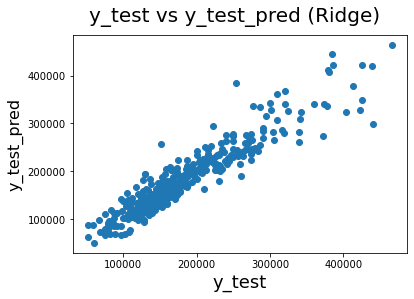

In [74]:
y_test_ridgepred = ridge.predict(X_test_rfe)
fig=plt.figure()
plt.scatter(y_test,y_test_ridgepred)
fig.suptitle('y_test vs y_test_pred (Ridge)',fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

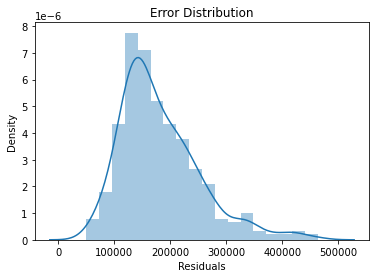

In [75]:
#Error Distribution
y_res=y_test_ridgepred
sns.distplot(y_res,kde=True)
plt.title('Error Distribution')
plt.xlabel("Residuals")
plt.show()

### Lasso

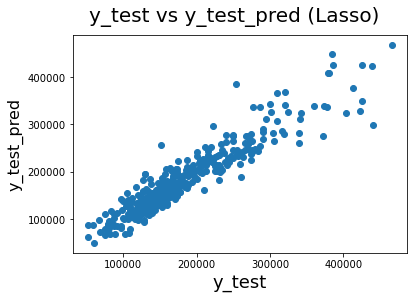

In [76]:
y_test_lassopred = lasso.predict(X_test_rfe)
fig=plt.figure()
plt.scatter(y_test,y_test_lassopred)
fig.suptitle('y_test vs y_test_pred (Lasso)',fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

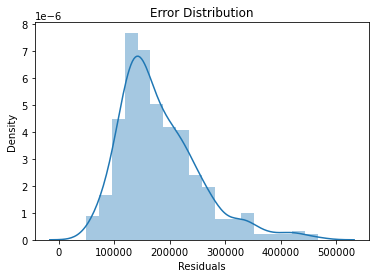

In [77]:
#Error Distribution
y_res=y_test_lassopred
sns.distplot(y_res,kde=True)
plt.title('Error Distribution')
plt.xlabel("Residuals")
plt.show()

In [78]:
#Creating a table with all metrics

lr_table={'Metric':['R2 Score (Train)','R2 core (Test)','RSS (Train)',
                    'RSS (Test)','MSE (Train)','MSE (Test)'],
                    'Ridge Regression':metric}

rg_metric=pd.DataFrame(lr_table,columns=['Metric','Ridge Regression'])

ls_metric=pd.Series(metric2, name='Lasso Regression')


final_metric=pd.concat([rg_metric,ls_metric],axis=1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.674315e-01,8.675908e-01
1,R2 core (Test),8.770256e-01,8.766068e-01
2,RSS (Train),6.820391e+11,6.812199e+11
3,RSS (Test),2.690416e+11,2.699579e+11
4,MSE (Train),2.731691e+04,2.730050e+04
5,MSE (Test),2.616456e+04,2.620908e+04



# Subjective Questions

#### Q1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ridge

In [79]:
#Current level of alpha is 0.3 Hence taking 0.6
ridge2=Ridge(alpha=0.6)
ridge2.fit(X_train_rfe,y_train)
y_pred_train=ridge2.predict(X_train_rfe)
y_pred_test=ridge2.predict(X_test_rfe)

In [80]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append({'r2_train_score' : r2_train_lr})

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append({'r2_test_score' : r2_test_lr})

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append({'rss_train' : rss1_lr})

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append({'rss_test' : rss2_lr})

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append({'mse_train' : mse_train_lr**0.5})

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append({'mse_test' : mse_test_lr**0.5})

0.8667466496841933
0.8786026675874294
685562787514.4666
265591317991.67767
750068695.3112326
675804880.3859483


Lasso

In [81]:
#current alpha is 10. Hence taking double which is 20
lasso2=Lasso(alpha=200)
lasso2.fit(X_train_rfe,y_train)
y_pred_train=lasso2.predict(X_train_rfe)
y_pred_test=lasso2.predict(X_test_rfe)

In [82]:
#calculating metrics
metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8576591804745495
0.883207151140415
732316063946.5437
255517695851.8405
801221076.5279472
650172254.0759301


In [83]:
new_coeff=pd.DataFrame(index=X_train_rfe.columns)
new_coeff.rows=X_train_rfe.columns
new_coeff['Ridge2']=ridge2.coef_
new_coeff['Ridge']=ridge.coef_
new_coeff['Lasso']=lasso.coef_
new_coeff['Lasso2']=lasso2.coef_
pd.set_option('display.max_rows',None)
new_coeff.sort_values(by='Ridge2',ascending=False)

,Ridge2,Ridge,Lasso,Lasso2
GrLivArea,119647.820963,121129.038711,1.892914e+05,2.061966e+05
1stFlrSF,100871.422079,102414.710407,4.300321e+04,2.753867e+04
BsmtFinSF1,87197.397102,87052.075608,8.587464e+04,7.944806e+04
OverallQual_VP,64285.977000,67582.253605,6.993505e+04,4.268879e+04
GarageArea,59112.585887,59915.927764,5.996781e+04,5.098918e+04
OverallQual_P,56256.519408,55644.581493,5.529836e+04,6.091141e+04
2ndFlrSF,48293.244520,48388.723562,1.202229e+04,0.000000e+00
GarageYrBlt_2009.0,44811.669273,44923.449291,4.480936e+04,3.985386e+04
RoofMatl_Metal,42594.160739,57137.378192,6.691381e+04,0.000000e+00
BsmtUnfSF,38964.918841,38607.640375,3.716744e+04,2.957521e+04


The optimal values of alpha for Ridge regression is 0.3 and for Lasso Regression is 10.
There are no change in predictor variables when the alpha values are doubled. However after doubling the alpha it was observed that the model coeff values have been reduced due to higher cost function penalty

#### Q2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?



In [84]:
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.674315e-01,8.675908e-01
1,R2 core (Test),8.770256e-01,8.766068e-01
2,RSS (Train),6.820391e+11,6.812199e+11
3,RSS (Test),2.690416e+11,2.699579e+11
4,MSE (Train),2.731691e+04,2.730050e+04
5,MSE (Test),2.616456e+04,2.620908e+04


It is observed that the R2 score on test data is slighltly better for Ridge Regression on test data. 
However it is also observed that Lasso Regression uses fewer number of predictor variables for arriving at the similar R2score

Since the Lasso Regression model is more simpler and as accurate as the Ridge Regression model, we will go for Lasso Regression Model as our final model.

#### Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [85]:

new_coeff.sort_values(by='Lasso',ascending=False)

,Ridge2,Ridge,Lasso,Lasso2
GrLivArea,119647.820963,121129.038711,1.892914e+05,2.061966e+05
BsmtFinSF1,87197.397102,87052.075608,8.587464e+04,7.944806e+04
OverallQual_VP,64285.977000,67582.253605,6.993505e+04,4.268879e+04
RoofMatl_Metal,42594.160739,57137.378192,6.691381e+04,0.000000e+00
GarageArea,59112.585887,59915.927764,5.996781e+04,5.098918e+04
OverallQual_P,56256.519408,55644.581493,5.529836e+04,6.091141e+04
GarageYrBlt_2009.0,44811.669273,44923.449291,4.480936e+04,3.985386e+04
1stFlrSF,100871.422079,102414.710407,4.300321e+04,2.753867e+04
MSZoning_RL,35931.220916,41086.495994,4.203545e+04,7.644126e+03
BsmtUnfSF,38964.918841,38607.640375,3.716744e+04,2.957521e+04


In [86]:
# Dropping top 5 predictor variables
X_test_q3 = X_test_rfe.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual_P', 'OverallQual_VP','GarageArea'],axis=1)
X_train_q3 = X_train_rfe.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual_P', 'OverallQual_VP','GarageArea'],axis=1)

In [87]:
lasso_q3=Lasso()
lasso_model_cv_q3=GridSearchCV(estimator=lasso, param_grid=params,
                           scoring='neg_mean_absolute_error',cv=folds,
                           return_train_score=True,verbose=1)
lasso_model_cv_q3.fit(X_train_q3,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=10.0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
print(lasso_model_cv_q3.best_params_)
print(lasso_model_cv_q3.best_score_)

{'alpha': 20}
-22694.283190875598


In [89]:
lasso_q3=Lasso(alpha=lasso_model_cv_q3.best_params_['alpha'])
lasso_q3.fit(X_train_q3,y_train)
lasso_q3.coef_

array([ 6.04258278e+04, -3.10862204e+04,  3.26412584e+05,  1.15905747e+05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.44967498e+03,
        0.00000000e+00,  1.41431689e+04,  1.29451003e+04,  2.11313365e+04,
        1.49117480e+04, -3.49070088e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.87354934e+03,  0.00000000e+00,  0.00000000e+00,
        6.43458213e+04,  5.86705745e+03,  0.00000000e+00,  2.96885056e-11,
       -1.18160795e+05, -8.48567694e+04, -1.13557237e+05, -0.00000000e+00,
       -3.64535874e+04, -1.49007028e+04, -1.04073884e+05, -8.18468356e+03,
       -0.00000000e+00,  5.47629242e+04, -3.22329557e+02, -0.00000000e+00,
        0.00000000e+00, -3.92052812e+02, -1.07189347e+03, -3.13942248e+02,
       -4.23604531e+03,  8.24273794e+03, -0.00000000e+00, -0.00000000e+00,
       -3.22492714e+02])

In [90]:
lasso_coeff=pd.DataFrame(index=X_train_q3.columns)
lasso_coeff.rows=X_train_q3.columns
lasso_coeff['Lasso']=lasso_q3.coef_

pd.set_option('display.max_rows',None)
lasso_coeff.sort_values(by='Lasso',ascending=False)

,Lasso
1stFlrSF,3.264126e+05
2ndFlrSF,1.159057e+05
RoofMatl_Metal,6.434582e+04
YearBuilt,6.042583e+04
GarageYrBlt_2009.0,5.476292e+04
MSZoning_RL,2.113134e+04
MSZoning_RM,1.491175e+04
MSZoning_FV,1.414317e+04
MSZoning_RH,1.294510e+04
GarageCond_Gd,8.242738e+03


The 5 important predictor for the new model created without the top 5 predictor variables of the original model are -1stFlrSF, 2ndFlrSF, RoofMatl_Metal, YearBuilt,GarageYrBlt_2009.0

#### Q4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The R2 score for the test and training set should be almost equal. A models predictive power on the test data shows how good a model is.

In order to ensure that the model has good predictive power on the test data, it has to be ensured that there is no overfitting. We use Ridge regression and Lasso Regression for elminating the possibilty of overfitting.

Ridge and Lasso includes a cost function penalty for the every predictor variable. The penalty value depends directly with the value of model coefficients the predictor variable caries.

Ridge and Lasso works by sacrificing small bias for significant reduction in variance of the model.

The implications of using a Ridge and Lasso regression is that the model arrived is not overfitting the training data. This means the when the model will have proper predictive power when used on the test data as implied by the very close R2 Score when the model is applied on train and test data.